In [1]:
## import pandas library for reading data and processing it
## import numpy for numeric data processing
## import seaborn library for heatmap / correlation map
## import matplotlib library for drawing plots
## import sqlite3 for database creation and related operations

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sqlite3

## import warnings so we can ignore the warning messages, if required
import warnings
warnings.filterwarnings("ignore")

# Import csv source data from formatted / cleaned csv from previous milestone

In [2]:
# read the csv file into a dataframe

csv_df = pd.read_csv('Covid_csv_data.csv')

In [3]:
## List out the column names present in the csv

csv_df.columns

Index(['CTRY_State', 'Health_Cond_Grp', 'Health_Cond', 'Age_Grp',
       'COVID_Deaths'],
      dtype='object')

In [4]:
## display the initial part of the data rows in the dataframe

csv_df.head()

,CTRY_State,Health_Cond_Grp,Health_Cond,Age_Grp,COVID_Deaths
0,AL,COVID-19,COVID-19,All Ages,8582.0
1,AK,COVID-19,COVID-19,All Ages,271.0
2,AZ,COVID-19,COVID-19,All Ages,12953.0
3,AR,COVID-19,COVID-19,All Ages,5048.0
4,CA,COVID-19,COVID-19,All Ages,46722.0


In [5]:
## Check the size of the DataFrame

csv_df.shape

(52, 5)

## =========================================================================

# Import html source data from formatted / cleaned excel from previous milestone

In [6]:
# read the csv file into a dataframe

html_df = pd.read_excel('Covid_html_data.xlsx')

In [7]:
## List out the column names present in the csv

html_df.columns

Index(['State_CD', 'State', 'Cases', 'Deaths', 'Recovery', 'Hospitalized'], dtype='object')

In [8]:
## display the initial part of the data rows in the dataframe

html_df.head()

,State_CD,State,Cases,Deaths,Recovery,Hospitalized
0,AL,Alabama,488973,9660,275245,45250
1,AK,Alaska,55560,290,7165,1260
2,AS,American Samoa,3,0,0,0
3,AZ,Arizona,810658,15650,0,57072
4,AR,Arkansas,316593,5377,306382,14617


In [9]:
## Check the size of the DataFrame

html_df.shape

(56, 6)

## =========================================================================

# Import API source data from formatted / cleaned csv from previous milestone

In [10]:
# read the csv file into a dataframe

api_df = pd.read_csv('Covid_api_data.csv')

In [11]:
## List out the column names present in the csv

api_df.columns

Index(['State', 'Total_Combined_Doses', 'CTRY', 'State_CD'], dtype='object')

In [12]:
## display the initial part of the data rows in the dataframe

api_df.head()

,State,Total_Combined_Doses,CTRY,State_CD
0,Alabama,881110,US,AL
1,Alaska,277520,US,AK
2,American Samoa,43210,US,AS
3,Arizona,1252220,US,AZ
4,Arkansas,539430,US,AR


In [13]:
## Check the size of the DataFrame

api_df.shape

(60, 4)

## =========================================================================

# Load each of the DataFrames into a sqlite3 database tables

In [14]:
## create the sqlite3 connection for storing the csv data source Data in a table

conn = sqlite3.connect("milestone5.db")

### Drop the table if it exists already and then Create table for csv data source Dataframe

In [15]:
## if the table exists, we will drop it first and commit the changes before loading the data

conn.execute("DROP TABLE IF EXISTS csv_tbl")

conn.commit()                 ## commit() will ensure the table is dropped and changes are saved in the database

In [16]:
## create a table csv_tbl, if it does not exist, to load the data from csv data source.

conn.execute("CREATE TABLE IF NOT EXISTS csv_tbl (CTRY_State text, Health_Cond_Grp text, Health_Cond text, Age_Grp text, COVID_Deaths integer)")

conn.commit()                 ## commit() will ensure the table creation is saved in the database

In [17]:
## load the csv data source into the table created above. 
## if_exists='replace' option will replace the data and 'index=False' will ensure index is not loaded as a table column.

csv_df.to_sql('csv_tbl', conn, if_exists='replace', index=False)

conn.commit()                 ## commit() will ensure the data is loaded and saved in the table

### Drop the table if it exists already and then Create table for html data source Dataframe

In [18]:
## if the table exists, we will drop it first and commit the changes before loading the data

conn.execute("DROP TABLE IF EXISTS html_tbl")

conn.commit()                 ## commit() will ensure the table is dropped and changes are saved in the database

In [19]:
## create a table html_tbl, if it does not exist, to load the data from csv data source

conn.execute("CREATE TABLE IF NOT EXISTS html_tbl (State_CD text, State text, Cases integer, Deaths integer, Recovery integer, Hospitalized integer)")

conn.commit()                ## commit() will ensure the table creation is saved in the database

In [20]:
## load the html data source into the table created above.
## if_exists='replace' option will replace the data and 'index=False' will ensure index is not loaded as a table column.

html_df.to_sql('html_tbl', conn, if_exists='replace', index=False)

conn.commit()               ## commit() will ensure the data is loaded and saved in the table

### Drop the table if it exists already and then Create table for API data source Dataframe

In [21]:
## if the table exists, we will drop it first and commit the changes before loading the data

conn.execute("DROP TABLE IF EXISTS api_tbl")

conn.commit()                 ## commit() will ensure the table is dropped and changes are saved in the database

In [22]:
## create a table api_tbl, if it does not exist, to load the data from csv data source

conn.execute("CREATE TABLE IF NOT EXISTS api_tbl (State text, Total_Combined_Doses integer, CTRY text, State_CD text)")

conn.commit()                ## commit() will ensure the table creation is saved in the database

In [23]:
## load the api data source into the table created above.
## if_exists='replace' option will replace the data and 'index=False' will ensure index is not loaded as a table column.

api_df.to_sql('api_tbl', conn, if_exists='replace', index=False)

conn.commit()               ## commit() will ensure the data is loaded and saved in the table

## JOIN the three tables from the database and pull the data in DF

In [24]:
## While using sqlite3, FULL OUTER JOINs and RIGHT OUTER JOINs are NOT supported. I was getting an error.

## So, to ensure that I am able to retain the data from all the DataFrames, I am using LEFT OUTER JOIN.
## With LEFT JOIN, we need to be careful to keep the table with most number of records should be first table.
## This will be followed up by table with second most number of records and then the third table.
## In our case, api_tbl has most number of records amongst three tables - 60 records, followed by html_tbl with 56 records.
## The third table is csv_tbl with 52 records.

sql1 = """
        SELECT  a.State_CD, a.Total_Combined_Doses,
                h.Cases, h.Recovery, h.Hospitalized,
                c.COVID_Deaths
        FROM api_tbl a 
        LEFT OUTER JOIN html_tbl h 
        ON a.State_CD = h.State_CD 
        LEFT OUTER JOIN csv_tbl c 
        on a.State_CD = c.CTRY_State

"""

result1 = conn.execute(sql1)

In [25]:
## While using sqlite3, FULL OUTER JOINs and RIGHT OUTER JOINs are NOT supported. I was getting an error.

## Tried another way as regular JOIN command. It works as INNER JOIN. The sequence of table order may not matter.
## But just retained it to be similar to previous sql query.

sql2 = """
        SELECT  a.State_CD, a.Total_Combined_Doses,
                h.Cases, h.Recovery, h.Hospitalized,
                c.COVID_Deaths
        FROM api_tbl a 
        JOIN html_tbl h 
        ON a.State_CD = h.State_CD 
        JOIN csv_tbl c 
        on a.State_CD = c.CTRY_State

"""

result2 = conn.execute(sql2)

In [26]:
## create a list of column names to be used for the DataFrame

cols = ['State_CD', 'Doses', 'Cases', 'Recovery', 'Hospitalized', 'Deaths']

In [27]:
df1 = pd.DataFrame(result1, columns=cols)    ## convert the result set into DataFrame and assign the column names

In [28]:
df1.fillna(0, inplace=True)            ## fillna(0) to default populate 0 in all the numeric columns

df1.head()                             ## display the DataFrame

,State_CD,Doses,Cases,Recovery,Hospitalized,Deaths
0,AL,881110,488973.0,275245.0,45250.0,8582.0
1,AK,277520,55560.0,7165.0,1260.0,271.0
2,AS,43210,3.0,0.0,0.0,0.0
3,AZ,1252220,810658.0,0.0,57072.0,12953.0
4,AR,539430,316593.0,306382.0,14617.0,5048.0


In [29]:
df2 = pd.DataFrame(result2, columns=cols)    ## convert the result set into DataFrame and assign the column names

In [30]:
df2.fillna(0, inplace=True)             ## fillna(0) to default populate 0 in all the numeric columns

df2.head()                              ## display the DataFrame

,State_CD,Doses,Cases,Recovery,Hospitalized,Deaths
0,AL,881110,488973,275245,45250,8582.0
1,AK,277520,55560,7165,1260,271.0
2,AZ,1252220,810658,0,57072,12953.0
3,AR,539430,316593,306382,14617,5048.0
4,CA,7023840,3450058,0,0,46722.0


In [31]:
## close() the connection after all the tables have been created and loaded correctly

conn.close()

In [32]:
## size of the df1, which comes from LEFT OUTER JOIN.

df1.shape       

(60, 6)

### This verifies that all records from the left most DataFrame are retained - 60 records

In [33]:
## size of the df2, which comes from normal JOIN. It works as INNER JOIN

df2.shape

(52, 6)

### This verifies that ONLY the Matching records from all the DataFrames are retained - 52 records

## =========================================================================

# Visualizations

## We will be using - df2 which is created from the JOIN - (effectively INNER JOIN) query in the sql2, defined above. The reason being, it provides data points for all the required features, discussed below

### Looking at the cleaned up and after filling in missing value counts with 0 earlier, we can notice that Recovery and Hospitalized columns contain 15 or more State records with 0 values out of the 52 we have got. So, we will not be using them for analysis / visualization activities. Ideally both these columns are related to number of COVID Cases for respective states.


### Considering above points, we will be considering below numeric features / columns for Visualizations / Analysis purpose


#### 1) Number of COVID Doses allocated for the respective US states (from api_tbl)
#### 2) Number of COVID Cases for the respective US states (from html_tbl)
#### 3) Number of COVID Deaths for the respective US states (from csv_tbl)
#### 4) State_CD - which is the common feature between all the tables and retrieved once

In [34]:
## display the statistics around the numeric data columns within the dataframe

df2.describe()

,Doses,Cases,Recovery,Hospitalized,Deaths
count,5.200000e+01,5.200000e+01,5.200000e+01,52.000000,52.000000
mean,1.141660e+06,5.407166e+05,2.216908e+05,16484.750000,8786.673077
std,1.283957e+06,6.406238e+05,3.892468e+05,22085.395823,10729.201481
min,1.089200e+05,1.469100e+04,0.000000e+00,0.000000,170.000000
25%,3.316125e+05,1.286698e+05,0.000000e+00,0.000000,1863.750000
50%,7.841675e+05,3.727085e+05,6.136400e+04,7732.000000,5534.500000
75%,1.297689e+06,6.440432e+05,3.163258e+05,23394.750000,10146.500000
max,7.023840e+06,3.450058e+06,2.353741e+06,89995.000000,46722.000000


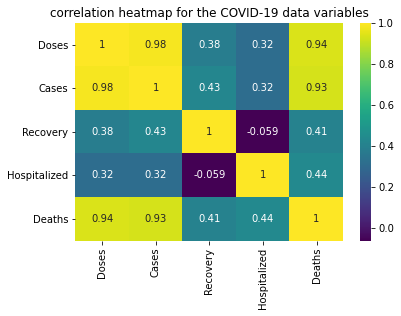

In [35]:
## correlation heatmap to identify the relationship between different variables within the dataframe

sns.heatmap(df2.corr(), annot=True, cmap="viridis")
plt.title("correlation heatmap for the COVID-19 data variables")
plt.show()

### As we can notice from above, there is strong correlation between 

#### 1) Number of COVID-19 Cases and Doses allocated for the given states
#### 2) Number of COVID-19 Cases and related Deaths for the given states
#### 3) Number of Doses allocated and COVID-19 related Deaths

#### Since about 30% of the data records (15 / 16 out of 52) in the columns Recovery / Hospitalized were missing and replaced with 0 as default. We can see a weak, but noticeable correaltion of these columns with other columns. But in reality, these are the by-products of the number of Cases.

In [36]:
## infer_objects() function automatically detects the column types in the DataFrame.
## sort_values() function will help us SORT the values in respective columns mentioned
## ascending=False will ensure we SORT the values in Descending order since need to see the Top 10 States statistics

## As discussed above, we will be using the selected columns - 'Cases', 'Deaths' and 'Doses' for sorting purposes.
## After sorting the required columns, we will be storing the newly sorted data in a dataframe

df3 = df2.infer_objects().sort_values(['Cases', 'Deaths', 'Doses'], ascending=False)

df3.head(10)         ## Display Top 10 rows from the sorted dataframe

,State_CD,Doses,Cases,Recovery,Hospitalized,Deaths
4,CA,7023840,3450058,0,0,46722.0
44,TX,4811395,2606275,2353741,0,40883.0
9,FL,3844030,1878533,0,79410,26473.0
32,NY,3621210,1591585,143071,89995,45091.0
13,IL,2324585,1177320,0,0,18935.0
10,GA,1825210,990821,0,55167,12991.0
35,OH,2113165,958153,894113,49651,17918.0
38,PA,2373135,917848,816884,0,22802.0
33,NC,1841700,846284,795521,0,4716.0
2,AZ,1252220,810658,0,57072,12953.0


## Visualization with data from html_tbl and csv_tbl

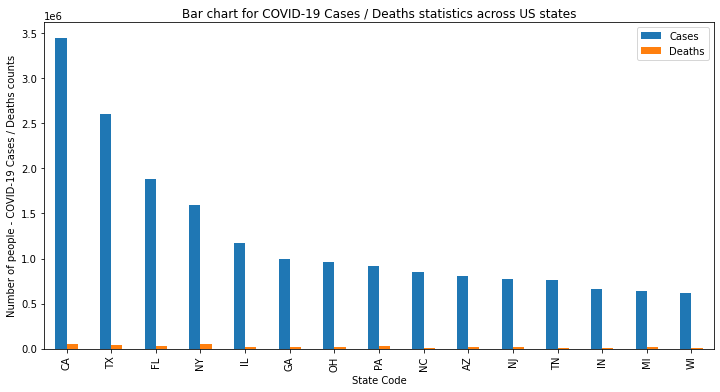

In [37]:
## [0:15] - slicing will ensure we select Top 15 records by counts for Visualization purpose
## ['State_CD', 'Cases', 'Deaths'] - columns from html_tbl and csv_tbl along with State_CD

df3[0:15][['State_CD', 'Cases', 'Deaths']].plot(figsize=(12,6), x='State_CD', kind="bar",
                            title = "Bar chart for COVID-19 Cases / Deaths statistics across US states")

plt.xlabel("State Code")
plt.ylabel("Number of people - COVID-19 Cases / Deaths counts")

plt.show()

### As we can notice looking at above Bar chart, Top 5 of the States affected the most with COVID-19 cases and Deaths are below:

#### 1) California (CA)
#### 2) Texas (TX)
#### 3) Florida (FL)
#### 4) New York (NY)
#### 5) Illinois (IL)

#### Other states featuring on this plot are Georgia (GA), Ohio (OH), Pennsylvenia (PA), North Carolina (NC) and Arizona (AZ)

## =========================================================================

## Visualization with data from html_tbl and api_tbl

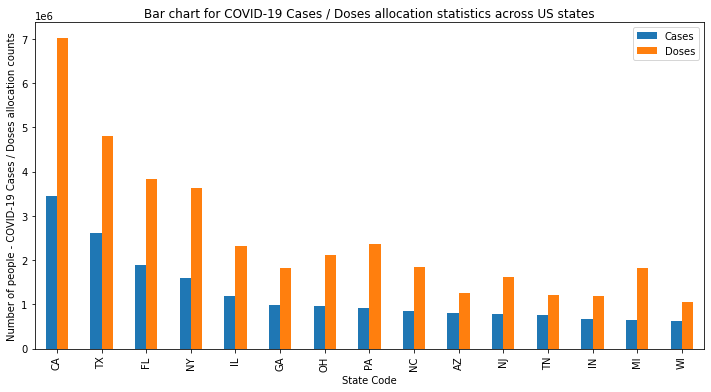

In [38]:
## [0:15] - slicing will ensure we select Top 10 records by counts for Visualization purpose
## ['State_CD', 'Cases', 'Doses'] - columns from html_tbl and api_tbl along with State_CD

df3[0:15][['State_CD', 'Cases', 'Doses']].plot(figsize=(12,6), x='State_CD', kind="bar", 
                                 title = "Bar chart for COVID-19 Cases / Doses allocation statistics across US states")

plt.xlabel("State Code")
plt.ylabel("Number of people - COVID-19 Cases / Doses allocation counts")

plt.show()

### As we can notice looking at above Bar chart, Top 5 of the States affected the most with COVID-19 cases and COVID Doses allocations are below:

#### 1) California (CA)
#### 2) Texas (TX)
#### 3) Florida (FL)
#### 4) New York (NY)
#### 5) Illinois (IL)

#### Other states featuring on this plot are Georgia (GA), Ohio (OH), Pennsylvenia (PA), North Carolina (NC) and Arizona (AZ)

## =========================================================================

## Visualization for the data from html_tbl and api_tbl

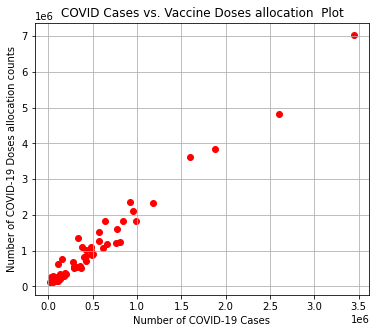

In [39]:
## Scatter Plot to observe the relationship between COVID related deaths and COVID vaccine doses allocation

plt.figure(figsize=(6,5))
plt.scatter(df3.Cases, df3.Doses, c='red')
plt.xlabel("Number of COVID-19 Cases")
plt.ylabel("Number of COVID-19 Doses allocation counts")
plt.grid(True)
plt.title("COVID Cases vs. Vaccine Doses allocation  Plot")
plt.show()

## As we can notice, there is strong linear correlation between Number of COVID-19 cases and the Number of COVID-19 vaccine doses allocation for the states.

## =========================================================================

## Visualization for the data from csv_tbl and api_tbl

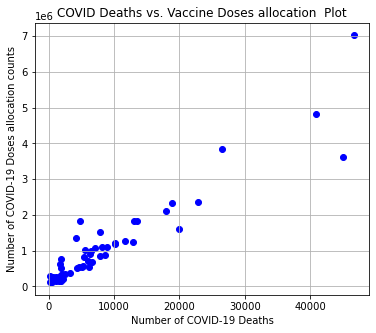

In [40]:
## Scatter Plot to observe the relationship between COVID related deaths and COVID vaccine doses allocation

plt.figure(figsize=(6,5))
plt.scatter(df3.Deaths, df3.Doses, c='blue')
plt.xlabel("Number of COVID-19 Deaths")
plt.ylabel("Number of COVID-19 Doses allocation counts")
plt.grid(True)
plt.title("COVID Deaths vs. Vaccine Doses allocation  Plot")
plt.show()

## As we can notice, there is definite correlation between Number of COVID-19 related deaths and the Number of COVID-19 vaccine doses allocation for the states.

## =========================================================================

## Visualization for the data from html_tbl and csv_tbl

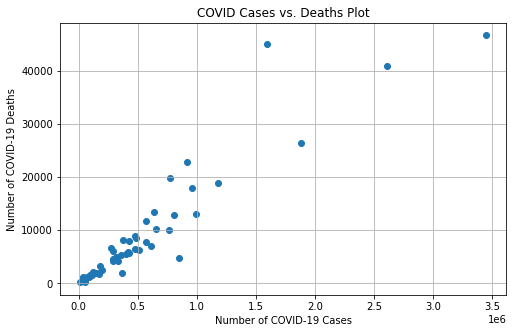

In [41]:
## Scatter Plot to observe the relationship between COVID related cases and deaths

plt.figure(figsize=(8,5))
plt.scatter(df3.Cases, df3.Deaths)
plt.xlabel("Number of COVID-19 Cases")
plt.ylabel("Number of COVID-19 Deaths")
plt.grid(True)
plt.title("COVID Cases vs. Deaths Plot")
plt.show()

## As we can notice, there is obvious correlation between Number of COVID-19 Cases and related deaths for the states.

## =========================================================================

## Visualization for the data from html_tbl and api_tbl

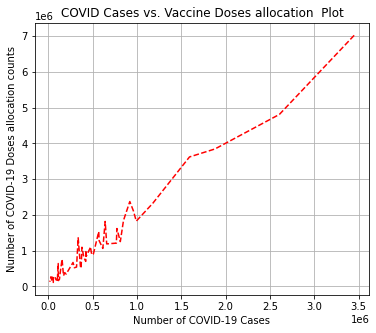

In [42]:
## Line Plot to observe the relationship between COVID related deaths and COVID vaccine doses allocation

plt.figure(figsize=(6,5))
plt.plot(df3.Cases, df3.Doses, 'r--')
plt.xlabel("Number of COVID-19 Cases")
plt.ylabel("Number of COVID-19 Doses allocation counts")
plt.grid(True)
plt.title("COVID Cases vs. Vaccine Doses allocation  Plot")
plt.show()

## As we can notice, there is strong linear correlation between Number of COVID-19 cases and the Number of COVID-19 vaccine doses allocation for the states.

## =========================================================================

## Visualization for the data from csv_tbl and api_tbl

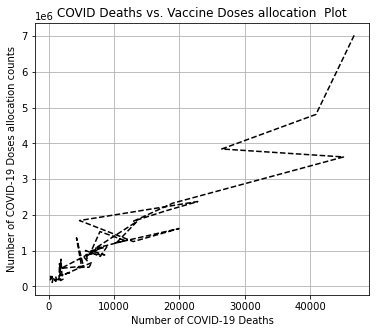

In [43]:
## Line Plot to observe the relationship between COVID related deaths and COVID vaccine doses allocation

plt.figure(figsize=(6,5))
plt.plot(df3.Deaths, df3.Doses, 'k--')
plt.xlabel("Number of COVID-19 Deaths")
plt.ylabel("Number of COVID-19 Doses allocation counts")
plt.grid(True)
plt.title("COVID Deaths vs. Vaccine Doses allocation  Plot")
plt.show()

### Looking at the above, there appears to be some distortions and outliers / instances for some state, where number of Deaths is more, however Doses allocated might be lesser than equially affected other state, which got higher vaccine doses allocations

## =========================================================================

## Visualization for the data from html_tbl and csv_tbl

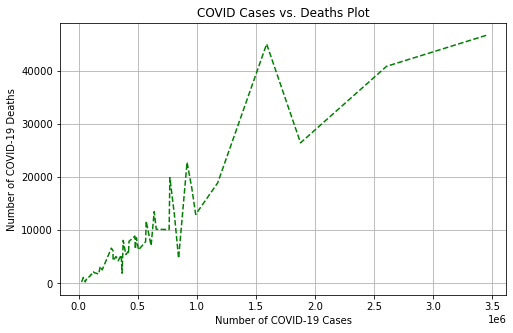

In [44]:
## Line Plot to observe the relationship between COVID related cases and deaths

plt.figure(figsize=(8,5))
plt.plot(df3.Cases, df3.Deaths, 'g--')
plt.xlabel("Number of COVID-19 Cases")
plt.ylabel("Number of COVID-19 Deaths")
plt.grid(True)
plt.title("COVID Cases vs. Deaths Plot")
plt.show()

## As we can notice, there is obvious correlation between Number of COVID-19 Cases and related deaths for the states.

## =========================================================================

# State level plot - COVID-19 Cases - most affected states

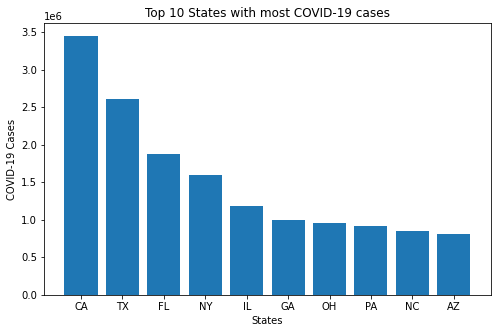

In [45]:
## plot the Age group vs Covid-19 Counts bar graph using matplotlib
## setting the appropriate title and labels for the plot. figure size helps draw larger size plots with clear information.
## We will be displaying only the Top 10 states information here - [0:10] slicing done.
## df3 was previously created and the first column used in sorting the data in descending order was 'Cases', use it as is.

plt.figure(figsize=(8, 5))
plt.bar(df3[:10].State_CD, df3[:10].Cases)
plt.xlabel('States')
plt.ylabel('COVID-19 Cases')
plt.title('Top 10 States with most COVID-19 cases')
plt.show()

## Looking at the above bar charts, it appears that Top 5 affected States / Regions in terms of most COVID-19 cases are:

#### 1) California (CA)
#### 2) Texas (TX)
#### 3) Florida (FL)
#### 4) New York (NY)
#### 5) Illinois (IL)

#### Other states which are affected amongst Top 10 states are Georgia (GA), Ohio (OH), Pennsylvenia (PA), North Carolina (NC) & Arizona (AZ)

## =========================================================================

# State level plot - COVID-19 Deaths - most affected states

In [46]:
## we will sort the dataframe df2 in descending order of COVID-19 related Deaths and store the info in another dataframe.

df4 = df2.sort_values(['Deaths'], ascending=False)

df4.head()                     ## Display initial few records from the sorted dataframe

,State_CD,Doses,Cases,Recovery,Hospitalized,Deaths
4,CA,7023840,3450058,0,0,46722.0
32,NY,3621210,1591585,143071,89995,45091.0
44,TX,4811395,2606275,2353741,0,40883.0
9,FL,3844030,1878533,0,79410,26473.0
38,PA,2373135,917848,816884,0,22802.0


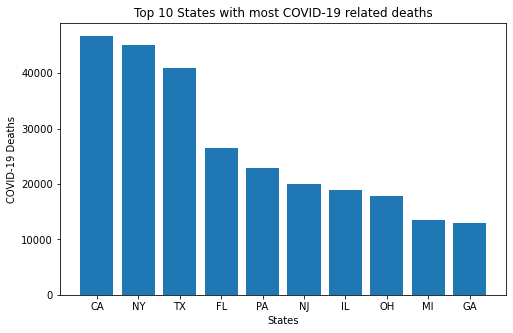

In [47]:
## plot the Age group vs Covid-19 Counts bar graph using matplotlib
## setting the appropriate title and labels for the plot. figure size helps draw larger size plots with clear information.
## We will be displaying only the Top 10 states information here - [0:10] slicing done

plt.figure(figsize=(8, 5))
plt.bar(df4[:10].State_CD, df4[:10].Deaths)
plt.xlabel('States')
plt.ylabel('COVID-19 Deaths')
plt.title('Top 10 States with most COVID-19 related deaths')
plt.show()

## Looking at the above bar charts, it appears that Top 5 affected States / Regions in terms of most COVID-19 related Deaths are:

#### 1) California (CA)
#### 2) New York (NY)
#### 3) Texas (TX)
#### 4) Florida (FL)
#### 5) Pennsylvenia (PA)

#### Other states which are affected amongst Top 10 states are New Jersey (NJ), Illinios (IL), Ohio (OH), Michigan (MI) & Georgia (GA)

## =========================================================================

# State level plot - COVID-19 Vaccine allocation - Top states

In [48]:
## we will sort the dataframe df2 in descending order of COVID-19 vaccine doses and store the info in another dataframe.

df5 = df2.sort_values(['Doses'], ascending=False)

df5.head()                     ## Display initial few records from the sorted dataframe

,State_CD,Doses,Cases,Recovery,Hospitalized,Deaths
4,CA,7023840,3450058,0,0,46722.0
44,TX,4811395,2606275,2353741,0,40883.0
9,FL,3844030,1878533,0,79410,26473.0
32,NY,3621210,1591585,143071,89995,45091.0
38,PA,2373135,917848,816884,0,22802.0


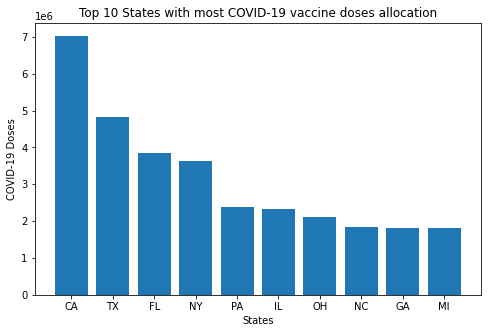

In [49]:
## plot the Age group vs Covid-19 Counts bar graph using matplotlib
## setting the appropriate title and labels for the plot. figure size helps draw larger size plots with clear information.
## We will be displaying only the Top 10 states information here - [0:10] slicing done

plt.figure(figsize=(8, 5))
plt.bar(df5[:10].State_CD, df5[:10].Doses)
plt.xlabel('States')
plt.ylabel('COVID-19 Doses')
plt.title('Top 10 States with most COVID-19 vaccine doses allocation')
plt.show()

## Looking at the above bar charts, it appears that Top 5 affected States / Regions in terms of most COVID-19 vaccine allocations are:

#### 1) California (CA)
#### 2) New York (NY)
#### 3) Texas (TX)
#### 4) Florida (FL)
#### 5) Pennsylvenia (PA)

#### Other states which are affected amongst Top 10 states are Illinios (IL), Ohio (OH), North Carolina (NC), Georgia (GA) & Michigan (MI)

## =========================================================================